In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [12]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int

In [13]:
def adder(state : AgentState) -> AgentState:
    """THis node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state : AgentState) -> AgentState:
    """THis node subtracts the 2 numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state : AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state['operation'] == '+':
        return "addition_operation"
    if state['operation'] == '-':
        return "subtraction_operation"

In [14]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) #pass_through function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge : Node
        "addition_operation" : "add_node", 
        "subtraction_operation" :"subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()



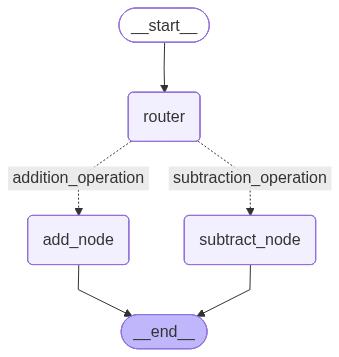

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
inital_state_1 = AgentState(number1 = 10, operation = '-', number2 = 5)
print(app.invoke(inital_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


## Exercise

In [32]:
class AgentState1(TypedDict):
    num1 : int
    num2 : int
    num3 : int
    num4 : int
    op1 : str
    op2 : str
    res1 : int
    res2 : int

def add_node(state : AgentState1) -> AgentState1:
    print("Adder")
    state['res1'] = state['num1'] + state['num2']
    print(f"Result of 1st operation: {state['res1']}")
    return state

def sub_node(state : AgentState1) -> AgentState1:
    print("Subtracter")
    state['res1'] = state['num1'] - state['num2']
    print(f"Result of 1st operation: {state['res1']}")
    return state

def add_node1(state : AgentState1) -> AgentState1:
    print("Adder 2")
    state['res2'] = state['num3'] + state['num4']
    print(f"Result of 2nd operation: {state['res2']}")
    return state

def sub_node1(state : AgentState1) -> AgentState1:
    print("Subtracter 2")
    state['res2'] = state['num3'] - state['num4']
    print(f"Result of 2nd operation: {state['res2']}")
    return state

def decide_next_node(state : AgentState1):
    if(state['op1'] == '+'):
        return 'add_op'
    elif(state['op1'] == '-'):
        return 'sub_op'

def decide_next_node1(state : AgentState1):
    if(state['op2'] == '+'):
        return 'add_op2'
    elif(state['op2'] == '-'):
        return 'sub_op2'

In [33]:
graph = StateGraph(AgentState1)
graph.add_node("adder", add_node)
graph.add_node("subtracter", sub_node)
graph.add_node("adder_2", add_node1)
graph.add_node("subtracter_2", sub_node1)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)
graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        "add_op" : "adder",
        "sub_op" : "subtracter"
    }
)
graph.add_conditional_edges(
    "router2",
    decide_next_node1,
    {
        "add_op2" : "adder_2",
        "sub_op2" : "subtracter_2"
    }
)
graph.add_edge("adder_2", END)
graph.add_edge("subtracter_2", END)
graph.add_edge(START, "router1")
graph.add_edge("adder", "router2")
graph.add_edge("subtracter", "router2")
app = graph.compile()

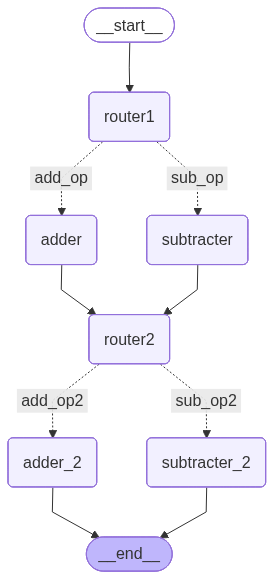

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
initial_state = AgentState1({"num1" : 10, "num2" : 3, 'num3' : 7, "num4" : 2, "op1" : "+", "op2" : "-"})
response = app.invoke(initial_state)
print(response)

Adder
Result of 1st operation: 13
Subtracter 2
Result of 2nd operation: 5
{'num1': 10, 'num2': 3, 'num3': 7, 'num4': 2, 'op1': '+', 'op2': '-', 'res1': 13, 'res2': 5}
